In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataAnalyst.csv')

df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2253.0,1126.000000,650.529400,0.0,563.0,1126.0,1689.0,2252.0
Rating,2253.0,3.160630,1.665228,-1.0,3.1,3.6,4.0,5.0
Founded,2253.0,1398.522858,901.929251,-1.0,-1.0,1979.0,2002.0,2019.0


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [7]:
df.shape

(2253, 15)

In [8]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [9]:
# df.dropna(inplace=True)

In [10]:
df.shape

(2253, 15)

In [11]:
df['Job Title'].value_counts()

Data Analyst                                                                405
Senior Data Analyst                                                          90
Junior Data Analyst                                                          30
Business Data Analyst                                                        28
Sr. Data Analyst                                                             21
                                                                           ... 
Data Analyst (LiDar, Ortho/Imagery)                                           1
Investment Advisory Data Analyst                                              1
Data Analyst - Top Secret w/ SCI Eligibility                                  1
Data & Reporting Analyst, Distribution Planning & Operations                  1
Data Scientist/Programmer, Sr. Analyst - Abbott Nutrition - Columbus, OH      1
Name: Job Title, Length: 1272, dtype: int64

In [12]:
len(df['Job Title'].value_counts())

1272

###### I thought may be we can differentiate the data on the basis of different Job Title. But it can't be helpfull as there are 1272 unique titles.

In [13]:
data = df['Job Title'].value_counts()
data = data.to_frame().reset_index()
data.rename(columns={'index': 'Job Title', 'Job Title': 'Count'}, inplace=True)
data

,Job Title,Count
0,Data Analyst,405
1,Senior Data Analyst,90
2,Junior Data Analyst,30
3,Business Data Analyst,28
4,Sr. Data Analyst,21
...,...,...
1267,"Data Analyst (LiDar, Ortho/Imagery)",1
1268,Investment Advisory Data Analyst,1
1269,Data Analyst - Top Secret w/ SCI Eligibility,1
1270,"Data & Reporting Analyst, Distribution Plannin...",1


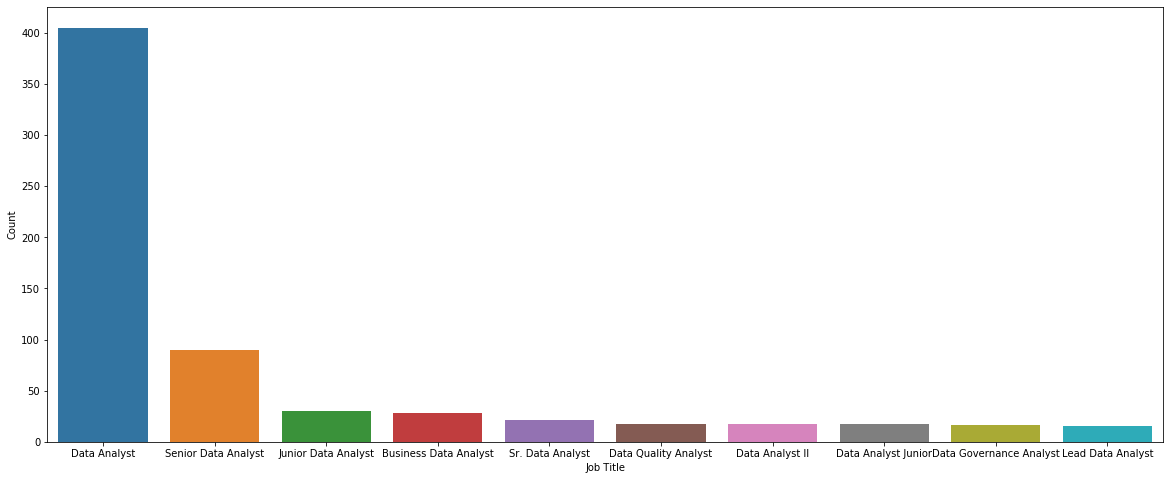

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(data['Job Title'].head(10),data['Count'].head(10))


 Word Cloud of Job Titles

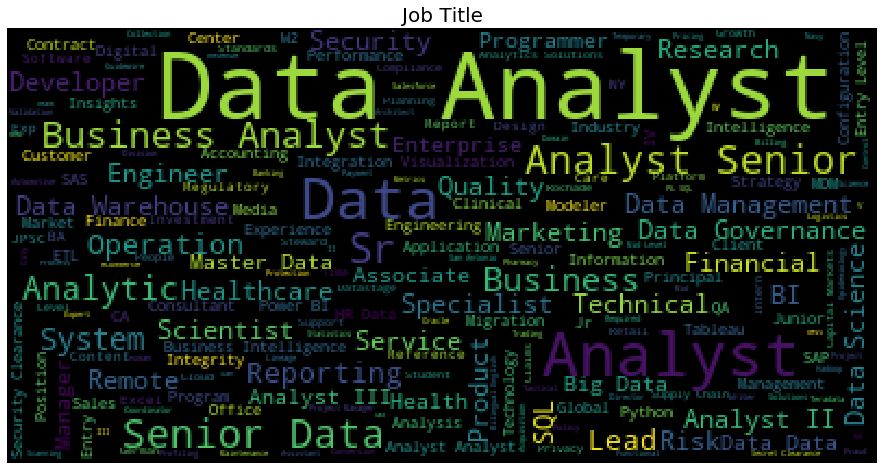

In [15]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(data['Job Title'])
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='black', stopwords=stopwords).generate(text)
plt.figure(figsize=(20,8))
plt.title('Job Title', fontsize=20)
plt.axis('off')
plt.imshow(wc)
plt.show()

#### Salary

In [16]:
df['Salary Estimate'].value_counts()

$41K-$78K (Glassdoor est.)     57
$42K-$76K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$60K-$124K (Glassdoor est.)    31
                               ..
$43K-$77K (Glassdoor est.)      3
$36K-$67K (Glassdoor est.)      3
$47K-$81K (Glassdoor est.)      3
$57K-$70K (Glassdoor est.)      2
-1                              1
Name: Salary Estimate, Length: 90, dtype: int64

divide the salary column into max salary and min salary

In [17]:
def minsalary(salaryrange):
  import re
  temp = re.findall(r'\d+', salaryrange)
  if len(temp) == 1:
    return -1
  return temp[0]

def maxsalary(salaryrange):
  import re
  temp = re.findall(r'\d+', salaryrange)
  if len(temp) == 1:
    return -1
  return temp[1]


In [18]:
index = np.arange(2253)
data = pd.DataFrame(index=index)
df['min_salary'] = df['Salary Estimate'].apply(minsalary).astype('int')
df['max_salary'] = df['Salary Estimate'].apply(maxsalary).astype('int')


### Max and Min Salary distribution.

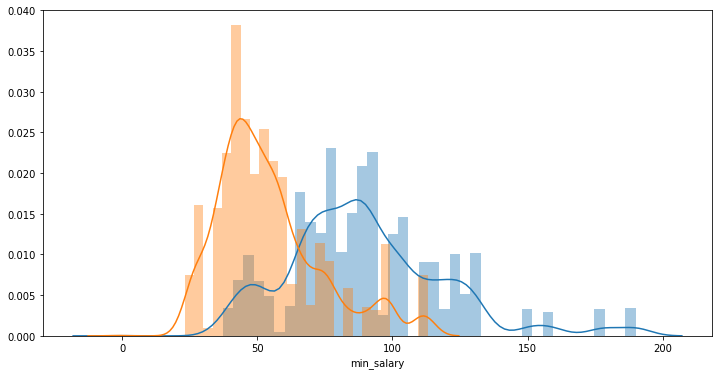

In [19]:
plt.figure(figsize=(12,6))
ax = plt.gca()
sns.distplot(df['max_salary'], ax = ax, bins=50)
sns.distplot(df['min_salary'], ax=ax)
plt.show()

Min salary distribution is a bit right skewed

 Max salary distribution is normal distribution

#### Top 15 Job Title with average maximum salary

In [20]:
data = df.groupby(['Job Title'])['max_salary'].mean().sort_values(ascending=False)
data = data.reset_index()
data.rename(columns={'max_salary':'average max salary'}, inplace=True)

In [21]:
data

,Job Title,average max salary
0,AI Insights Data Analyst,190.0
1,"Data Analyst, Product Insights",190.0
2,Data Analyst with Data Mapping and API,190.0
3,Senior Data Analyst Studio Finance Engineering,190.0
4,"Data Analyst, Autonomy Operations",190.0
...,...,...
1267,Data Analyst & Healthcare Analytics,38.0
1268,XYZ Data Analyst,38.0
1269,Data Expert Analyst/Modeler,38.0
1270,Compensation & HR Data Analyst,38.0


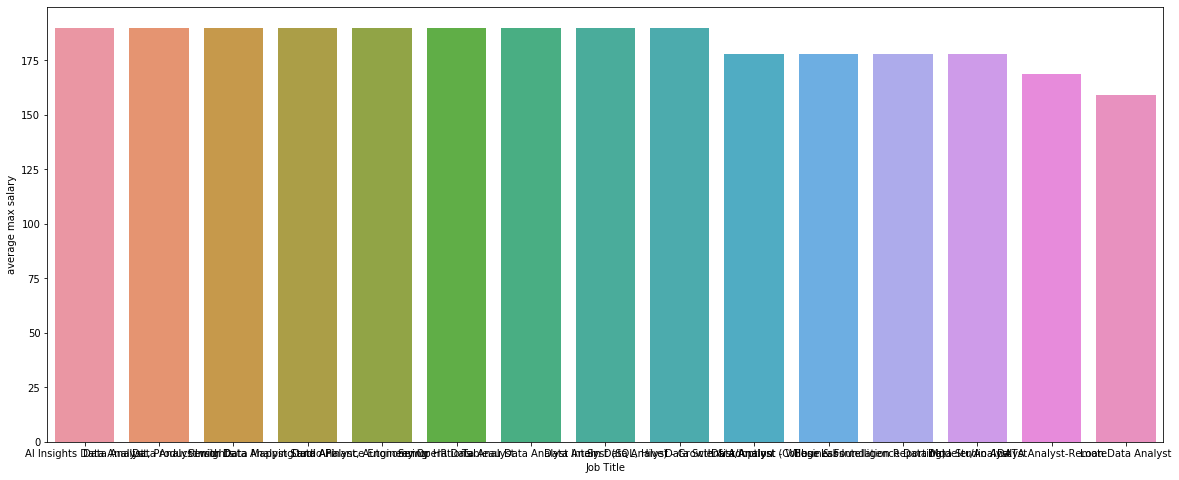

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(data['Job Title'].head(15),data['average max salary'].head(15))


Top 10 Job Title with least Average Min Salary

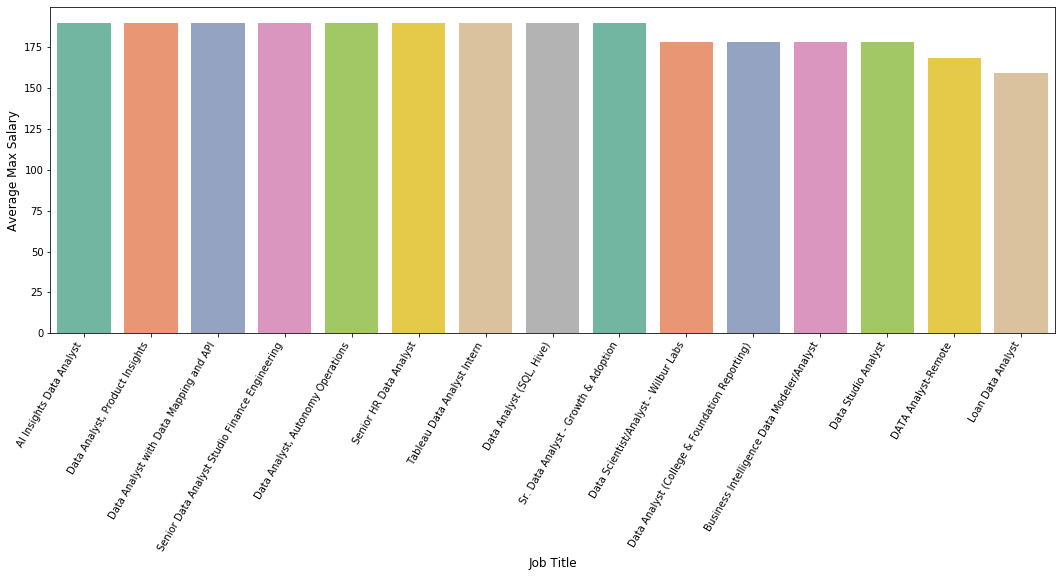

In [23]:
plt.figure(figsize=(18,6))
chart = sns.barplot(
    data=data.head(15),
    x='Job Title',
    y='average max salary',
    palette='Set2')

chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='right',
    fontweight='light'
)
plt.xlabel('Job Title',size=12)
plt.ylabel('Average Max Salary',size=12)
plt.show()


In [24]:
data = df.groupby(['Job Title'])['min_salary'].mean().sort_values()
data = data.reset_index()
data.rename(columns={'min_salary':'average min salary'}, inplace=True)

In [25]:
data

,Job Title,average min salary
0,Configuration/Data Management Analyst III,-1.0
1,Data Analyst - Retail (Entry Level),24.0
2,"Analyst, Data Intelligence",24.0
3,"Data Analyst (SQL, Tableau)",24.0
4,Data Science – Analyst/Associate - Security In...,24.0
...,...,...
1267,LIMS Master Data Analyst,113.0
1268,"Data Analyst - Health, Senior",113.0
1269,Senior Clinical Data Analyst,113.0
1270,19-0574 - Service Operations Data Analyst,113.0


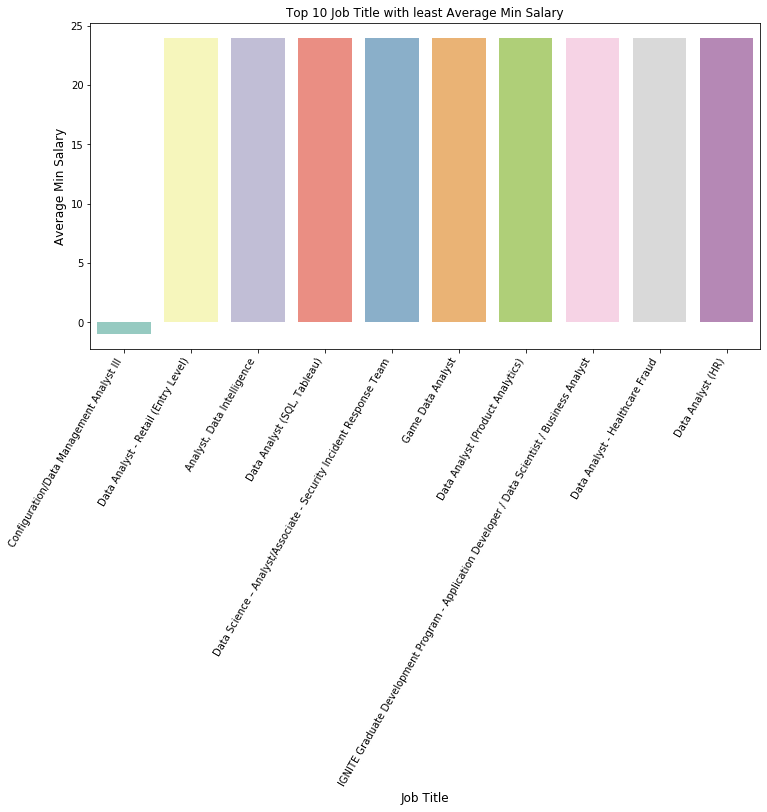

In [26]:
plt.figure(figsize=(12,6))

chart = sns.barplot(
    data=data.head(10),
    x='Job Title',
    y='average min salary',
    palette='Set3'
)
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment = 'right',
    fontweight='light'
)

plt.xlabel('Job Title', size=12)
plt.ylabel('Average Min Salary', size=12)
plt.title('Top 10 Job Title with least Average Min Salary', size=12)
plt.show()

##### we can see one value as -1. Which means isnull() ignored -1 i.e. null value in this columns.

lets convert -1, '-1', -1.0 to Nan.

In [27]:
df.replace('-1', np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)
df.replace(-1.0, np.nan, inplace=True);

#### bar plot of salary of top 10 Job Title with highest maximum salary

In [28]:
data = df[['Job Title', 'min_salary', 'max_salary']].groupby(['Job Title']).max().sort_values(by=['max_salary'],ascending=False)

In [29]:
data = data.reset_index()

In [30]:
data

,Job Title,min_salary,max_salary
0,Senior Data Analyst,110.0,190.0
1,Marketing Data Analyst,110.0,190.0
2,AI Insights Data Analyst,110.0,190.0
3,Senior HR Data Analyst,110.0,190.0
4,"Data Analyst, Autonomy Operations",110.0,190.0
...,...,...,...
1267,Compensation & HR Data Analyst,29.0,38.0
1268,Performance Data Analyst,29.0,38.0
1269,Business Analyst (Data Integration/Salesforce),29.0,38.0
1270,"Analyst, Data Mgmt / Quant Analysis",29.0,38.0


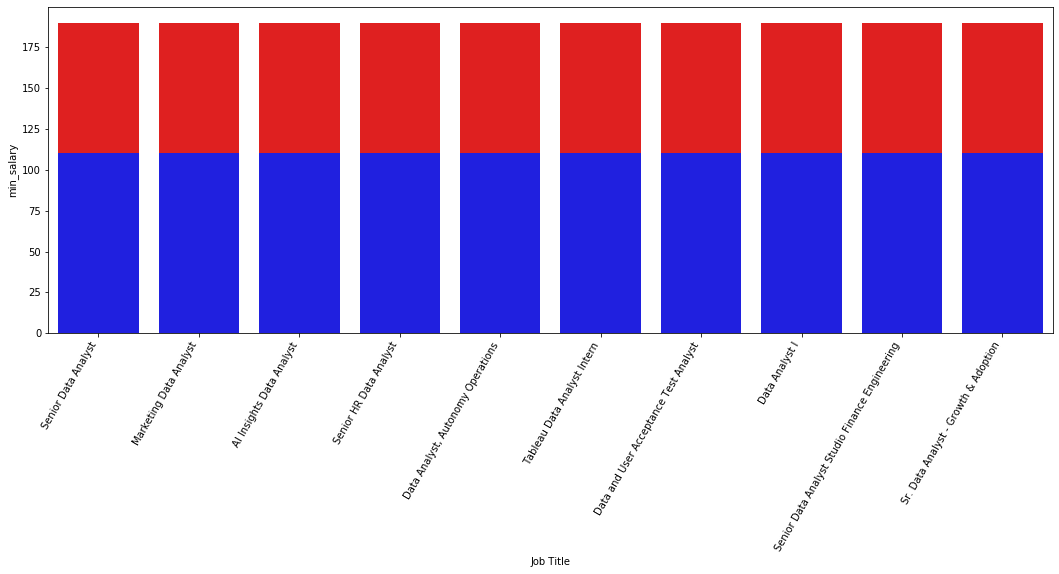

In [31]:
plt.figure(figsize=(18,6))

ax = plt.gca()

chart = sns.barplot(data=data.head(10),x='Job Title', y='max_salary', ax=ax, color='r')

sns.barplot(data=data.head(10),x='Job Title', y='min_salary', ax=ax, color='b')

chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

### Job Describtion

In [32]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0


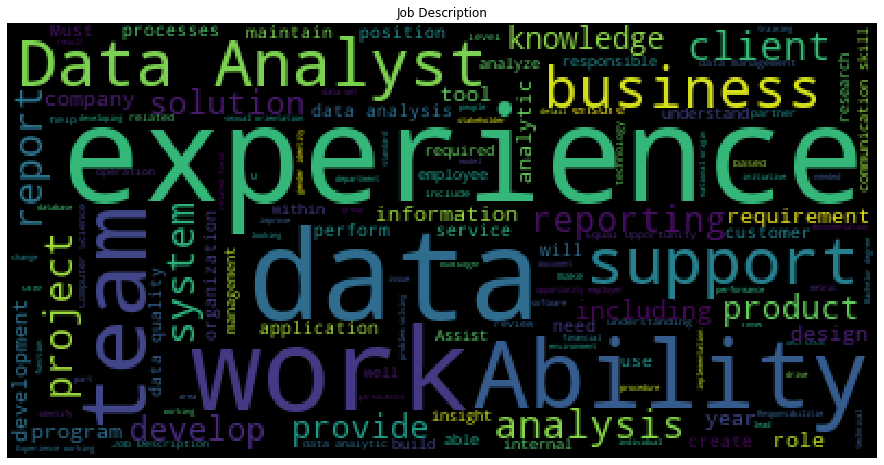

In [33]:
text = " ".join(df['Job Description'])
stopwords=set(STOPWORDS)
wc = WordCloud(stopwords=stopwords).generate(text)

plt.figure(figsize=(16,8))
plt.title('Job Description')
plt.axis('off')
plt.imshow(wc)

In [34]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0


### Rating

In [35]:
df['Rating'].value_counts()

3.9    140
3.6    135
3.7    132
5.0    131
3.8    130
4.0    129
3.5    125
4.1    119
3.3    109
3.4    101
3.2     91
3.1     68
3.0     57
4.3     55
4.5     47
4.2     47
4.6     46
4.4     46
2.8     43
2.9     40
2.5     32
4.8     29
2.7     25
4.7     23
4.9     17
2.6     14
2.4     10
1.0     10
2.3      9
2.0      6
2.1      4
2.2      3
1.6      2
1.8      2
1.9      2
1.7      2
Name: Rating, dtype: int64

In [36]:
data = df['Rating'].value_counts()

data = data.reset_index()
data.rename(columns={'index':'Ratings', 'Rating':'Count'}, inplace=True)
data.sort_values(by=['Ratings'], ascending=False, inplace=True, axis=0)

In [37]:
data.head()

,Ratings,Count
3,5.0,131
24,4.9,17
21,4.8,29
23,4.7,23
16,4.6,46


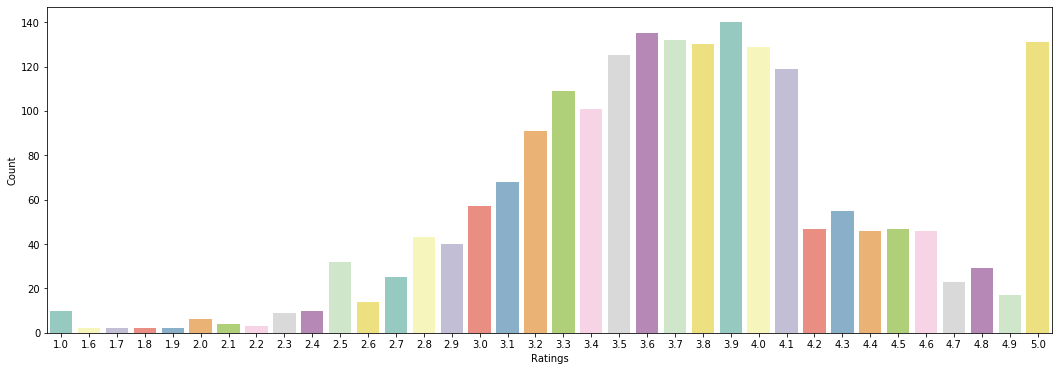

In [38]:
plt.figure(figsize=(18,6))

chart = sns.barplot(data=data,
                    x='Ratings',
                    y='Count',
                    palette='Set3')

plt.show()

#### Company Name

In [39]:
df['Company Name'].head()

0             Vera Institute of Justice\n3.2
1    Visiting Nurse Service of New York\n3.8
2                           Squarespace\n3.4
3                              Celerity\n4.1
4                               FanDuel\n3.9
Name: Company Name, dtype: object

In [40]:
def new(companyname):
  try:
    import re
    temp = re.findall(r'.*', companyname)
    return temp[0]
  
  except:
    return -1

df['Company Name'] = df['Company Name'].apply(new)

In [42]:
df['Company Name'].value_counts()

Staffigo Technical Services, LLC    58
Diverse Lynx                        22
Kforce                              19
Lorven Technologies Inc             19
Robert Half                         14
                                    ..
Doximity                             1
Informa Intelligence                 1
BurnsSearch, LLC                     1
911 Datamaster Inc                   1
Desert Choice Transport              1
Name: Company Name, Length: 1502, dtype: int64

#### Location

In [45]:
df['Location']

0         New York, NY
1         New York, NY
2         New York, NY
3         New York, NY
4         New York, NY
             ...      
2248        Denver, CO
2249    Centennial, CO
2250        Denver, CO
2251    Centennial, CO
2252    Broomfield, CO
Name: Location, Length: 2253, dtype: object

In [46]:

df['City'] = df['Location'].apply(lambda x:x.split(',')[0])
df['State'] = df['Location'].apply(lambda x: x.split(' ')[-1])

In [47]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0,New York,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,New York,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0,New York,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,New York,NY


plotting 'State' vs 'Count' i.e. number of jobs in that state.

In [48]:
data = df['State'].value_counts().reset_index()
data.rename(columns={'index':'State', 'State':'Count'}, inplace=True)

In [49]:
data

,State,Count
0,CA,626
1,TX,394
2,NY,345
3,IL,164
4,PA,114
5,AZ,97
6,CO,96
7,NC,90
8,NJ,86
9,WA,54


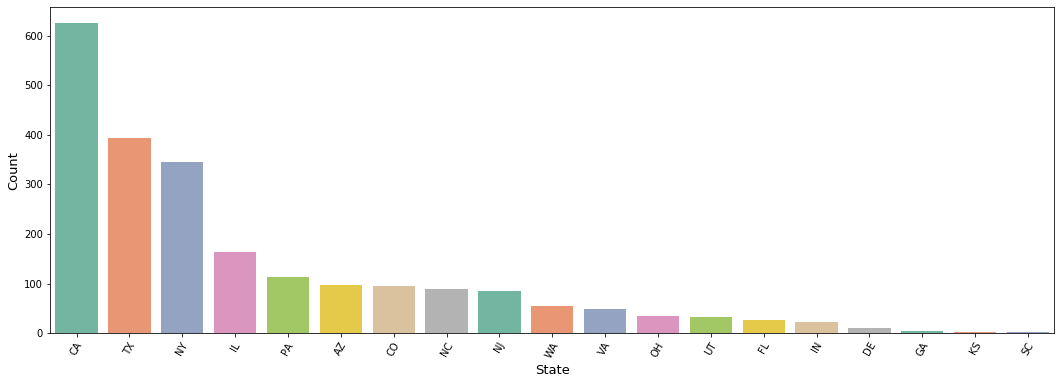

In [51]:
plt.figure(figsize=(18,6))

chart = sns.barplot(data=data,
                    x='State',
                    y='Count',
                    palette='Set2')

chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='center',
    fontweight='light'
)
plt.xlabel('State', size=13)
plt.ylabel('Count', size=13)
plt.show()

plotting'City' vs 'Count' i.e. number of jobs in that city, for top 15 cities.

In [52]:
data = df['City'].value_counts().sort_values(ascending=False).reset_index().head(15)
data.rename(columns={'index':'City', 'City':'Count'}, inplace=True)

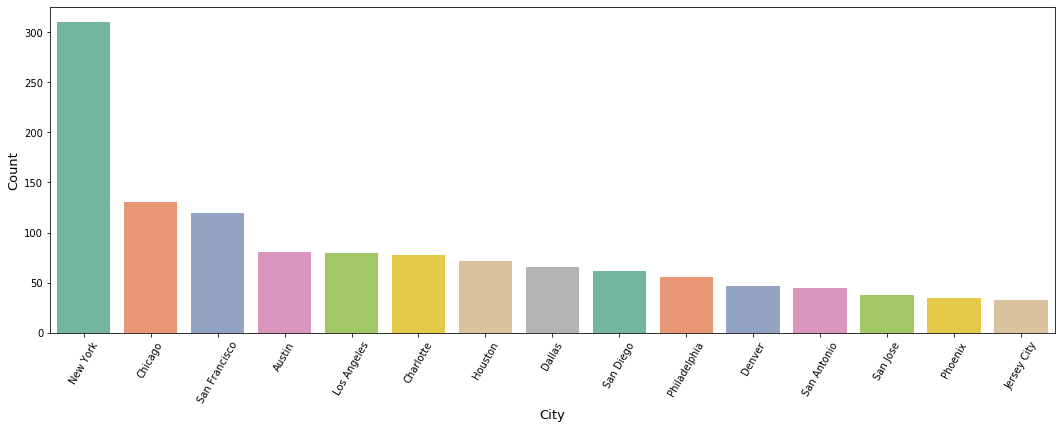

In [55]:
plt.figure(figsize=(18,6))

chart = sns.barplot(data=data,
                    x='City',
                    y='Count',
                    palette='Set2')

chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=60,
    horizontalalignment='center',
    fontweight='light'
)

plt.xlabel('City', size=13)
plt.ylabel('Count', size=13)
plt.show()

In [57]:
data.head()

,City,Count
0,New York,310
1,Chicago,130
2,San Francisco,119
3,Austin,81
4,Los Angeles,80


Top 10 cities with highest average max salary

In [58]:
data = df.groupby(['City'])['max_salary'].mean().sort_values(ascending=False).reset_index()

In [60]:
data.head()

,City,max_salary
0,Daly City,159.000000
1,Marin City,159.000000
2,Los Gatos,156.000000
3,Berkeley,149.000000
4,San Jose,138.289474


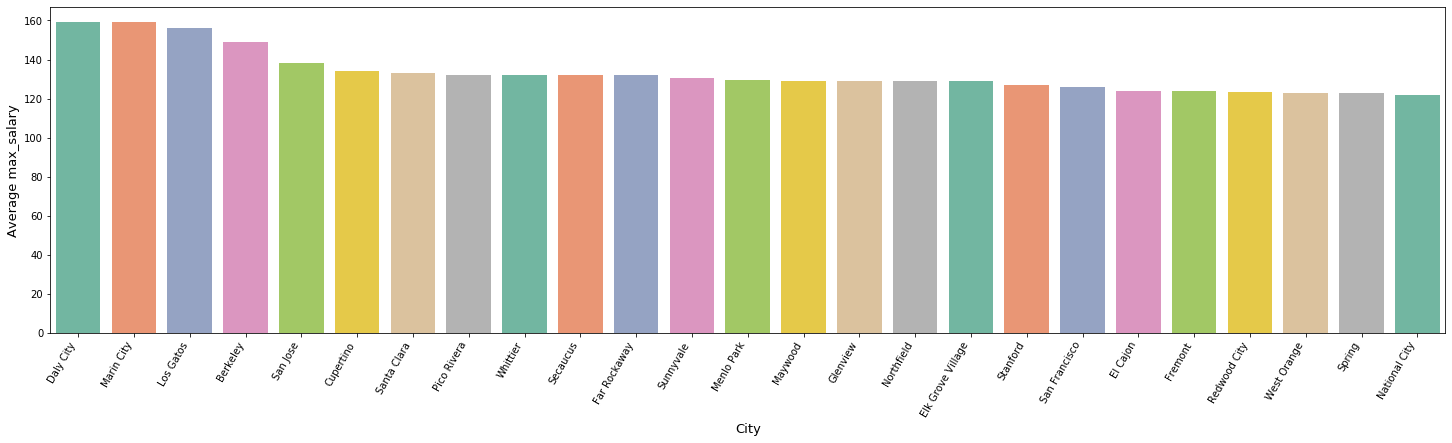

In [61]:
#### Very Easy Function #####

def boxplot(df, x, y, n, i=16):
    plt.figure(figsize=(i,6))

    chart = sns.barplot(data=data.head(n),
                      x=x,
                      y=y,
                      palette='Set2')
    
    chart = chart.set_xticklabels(
      chart.get_xticklabels(),
      rotation=60,
      horizontalalignment='right',
      fontweight='light'
      )
    plt.xlabel(x, size=13)
    plt.ylabel('Average '+y, size=13)
    plt.show()

boxplot(data, 'City', 'max_salary', 25, 25)

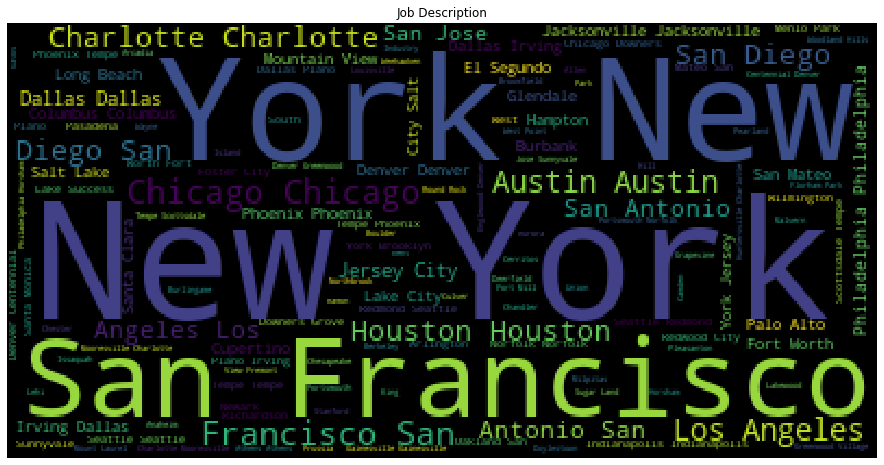

In [62]:
##### Word Cloud of cities

text = " ".join(df['City'])
wc = WordCloud(stopwords=stopwords).generate(text)

plt.figure(figsize=(16,8))
plt.title('Job Description')
plt.axis('off')
plt.imshow(wc);

#### Industries

In [63]:
df['Industry'].value_counts()

IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Consulting                          111
Computer Hardware & Software        111
                                   ... 
Hotels, Motels, & Resorts             1
Chemical Manufacturing                1
Truck Rental & Leasing                1
Express Delivery Services             1
Trucking                              1
Name: Industry, Length: 88, dtype: int64

Top 15 Industries with average maximun salary

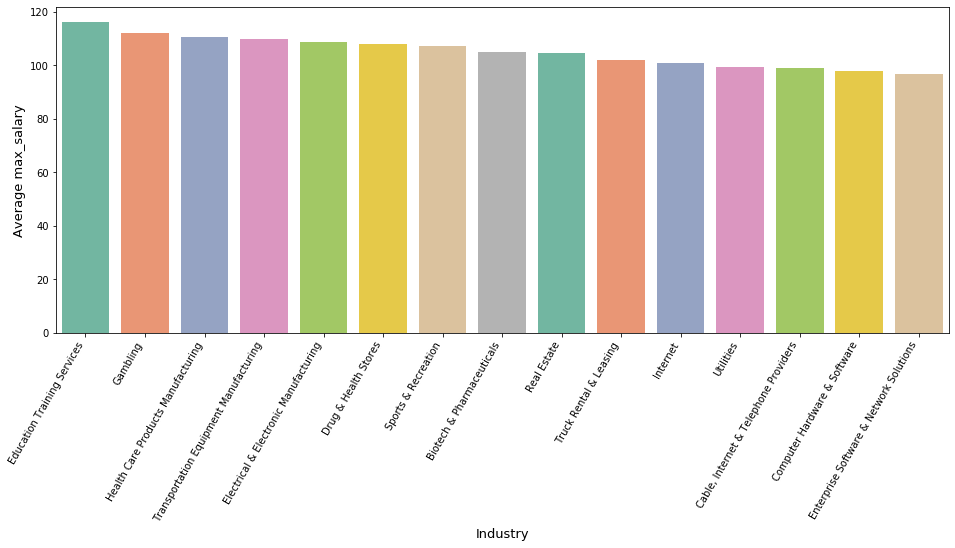

In [64]:
data = df.groupby(['Industry'])['max_salary'].mean().sort_values(ascending=False).reset_index()
boxplot(data, 'Industry', 'max_salary', 15)

Top 15 Industries with lowest minimum salary

In [67]:
data = df.groupby('Industry')['min_salary'].mean().sort_values(ascending=False).reset_index()

In [68]:
data

,Industry,min_salary
0,News Outlet,84.000000
1,Drug & Health Stores,82.500000
2,Education Training Services,69.666667
3,Health Care Products Manufacturing,69.200000
4,Sports & Recreation,69.000000
...,...,...
83,Casual Restaurants,36.200000
84,Preschool & Child Care,35.666667
85,Trucking,35.000000
86,Grocery Stores & Supermarkets,28.333333


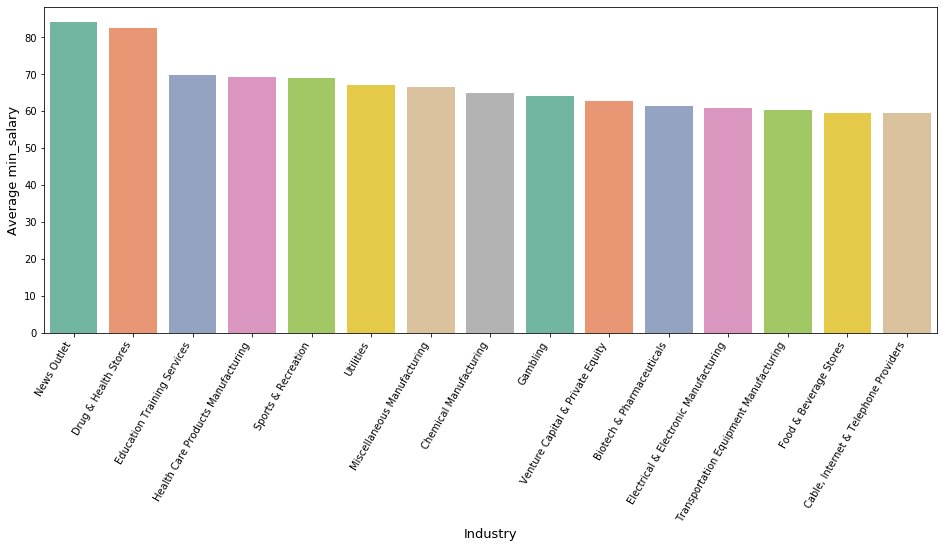

In [69]:
boxplot(data, 'Industry', 'min_salary', 15)

In [70]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0,New York,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,New York,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0,New York,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,78.0,104.0,Denver,CO
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,78.0,104.0,Centennial,CO
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,104.0,Denver,CO
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,78.0,104.0,Centennial,CO


##### Sector

Top 15 sectors with maximum average maximim salary

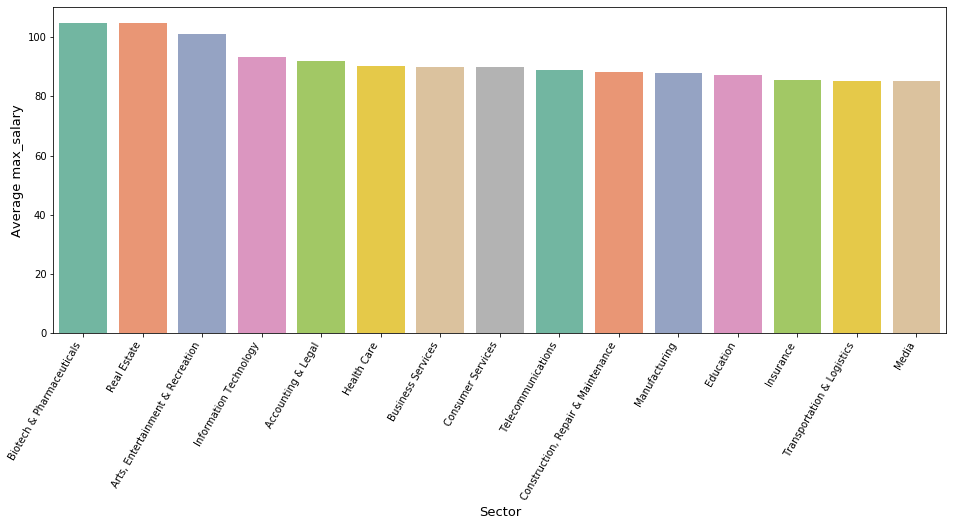

In [72]:
data = df.groupby(['Sector'])['max_salary'].mean().sort_values(ascending=False).reset_index()
boxplot(data, 'Sector', 'max_salary', 15)

Top 15 Sector with lowest average minimum salary

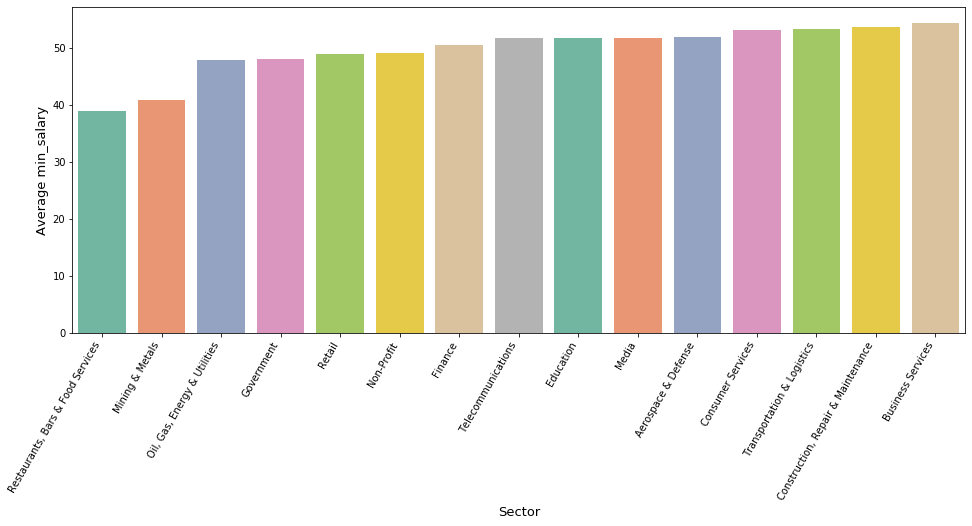

In [73]:
data = df.groupby(['Sector'])['min_salary'].mean().sort_values(ascending=True).reset_index()
boxplot(df, 'Sector', 'min_salary', 15)

In [78]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0,New York,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,New York,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0,New York,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,New York,NY


#### Competitors

Top 15 sectors with maximum average maximim salary

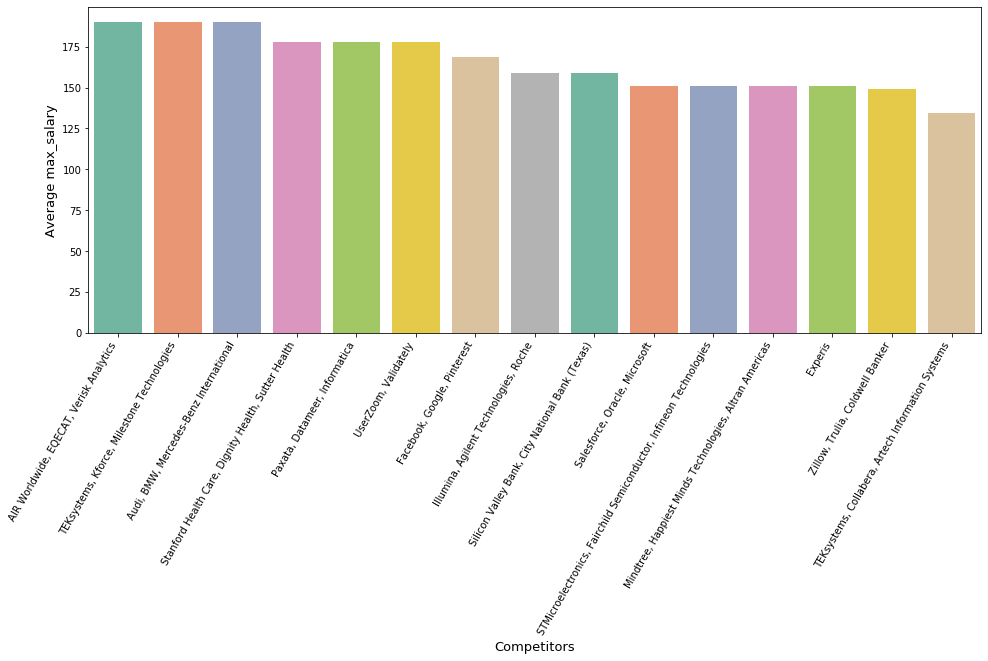

In [82]:
# df['Competitors'].value_counts()
data = df.groupby(['Competitors'])['max_salary'].mean().sort_values(ascending=False).reset_index()
boxplot(data, 'Competitors', 'max_salary', 15)

Top 15 Sector with lowest average minimum salary

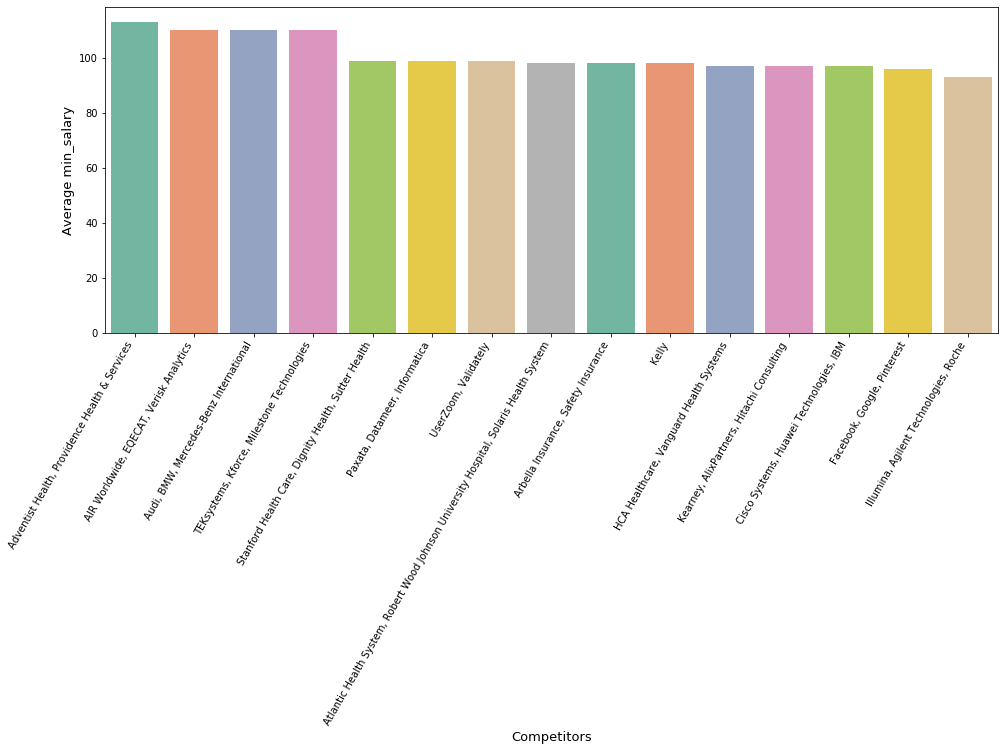

In [83]:
data = df.groupby(['Competitors'])['min_salary'].mean().sort_values(ascending=False).reset_index()
boxplot(data, 'Competitors', 'min_salary', 15)

In [84]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0,New York,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,New York,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0,New York,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,New York,NY


In [87]:
df['Easy Apply'].fillna("cannot_say",inplace=True)

In [89]:
df['Easy Apply'].isnull().sum()

0

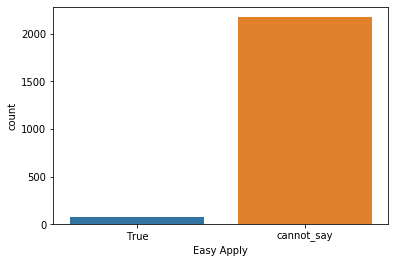

In [90]:
sns.countplot(df['Easy Apply'])

# Thankyou !!!